In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('winequality_red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Removing outiers

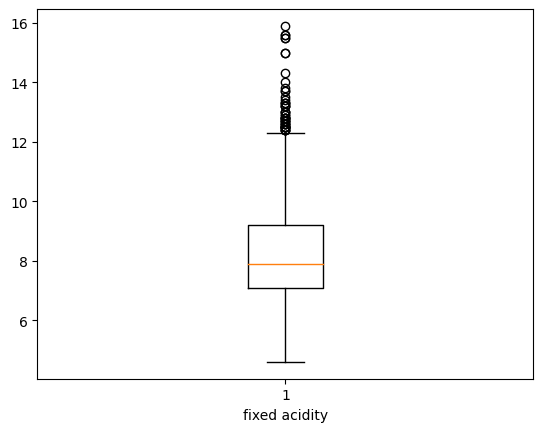

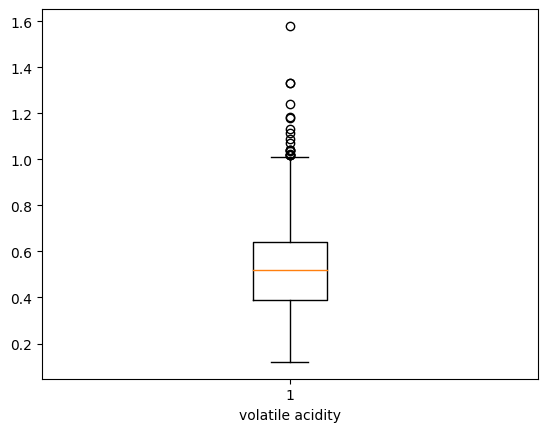

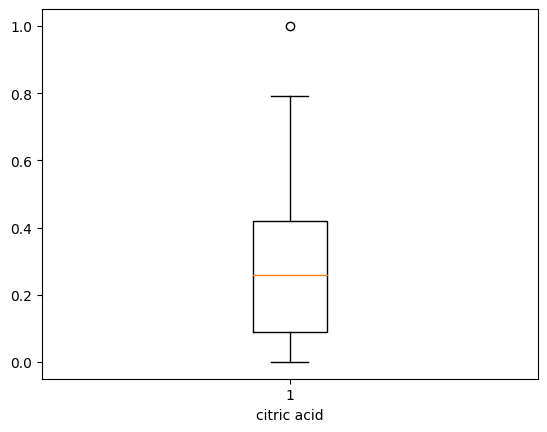

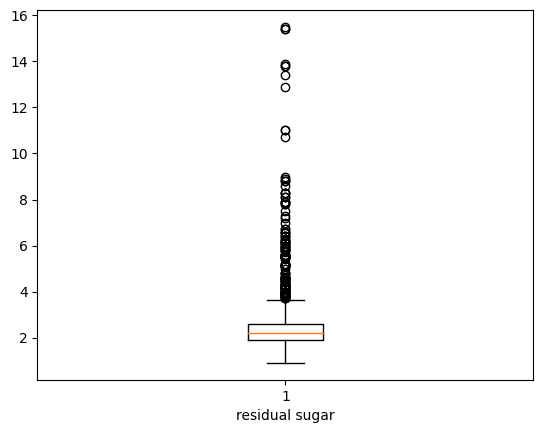

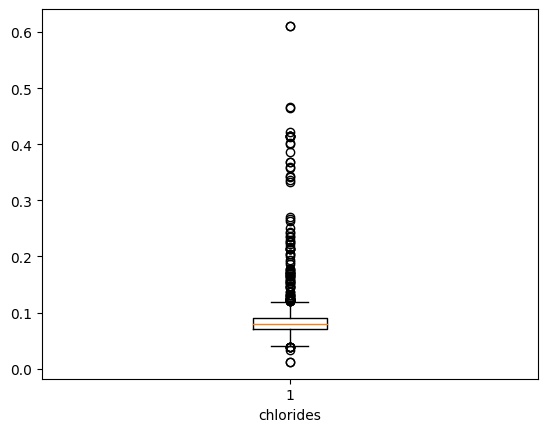

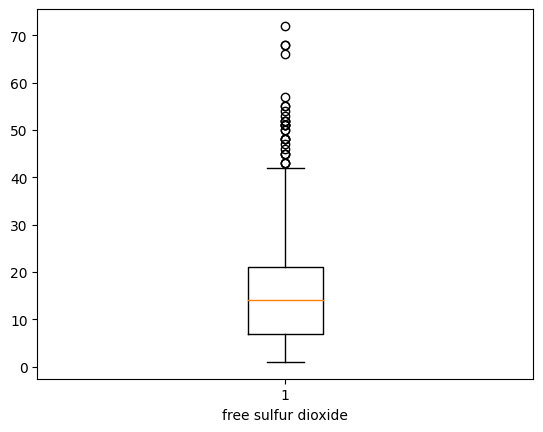

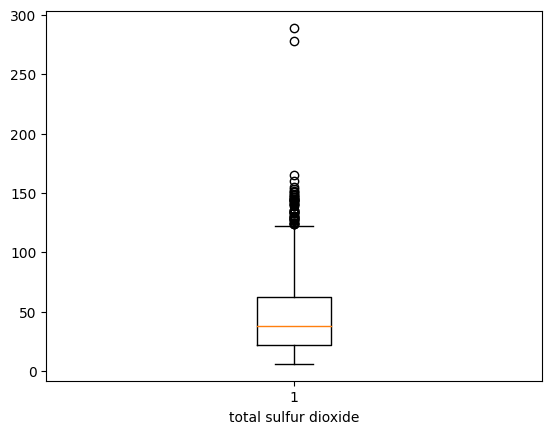

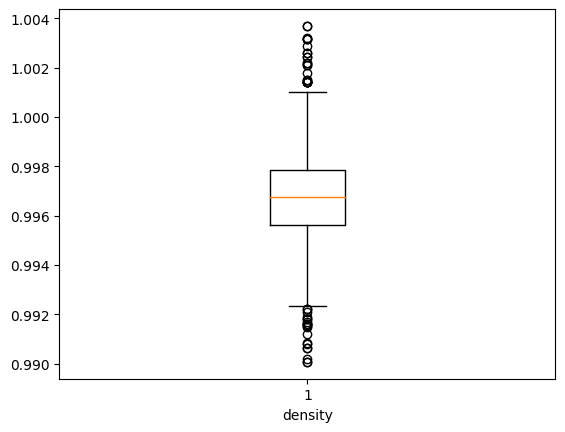

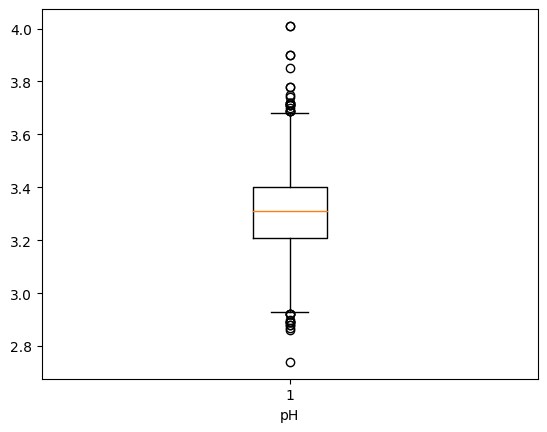

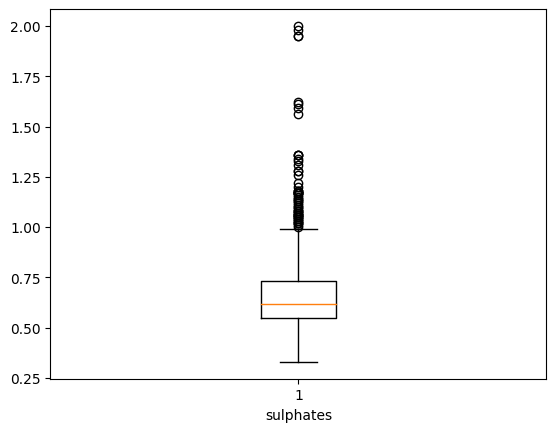

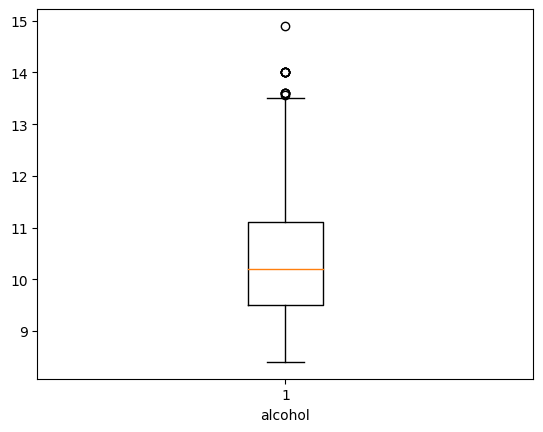

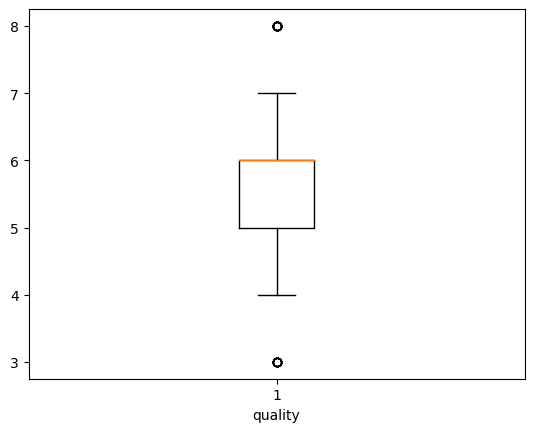

In [8]:
for col in df.columns:
    if df[col].dtype!= 'object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [9]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR=Q3-Q1
    UW=Q3+1.5*IQR
    LW=Q1-1.5*IQR
    df1=df[(df[i]>=LW) & (df[i]<=UW)]    

In [10]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
#for i in df.columns:
#    if df[i].dtype!="object":
#        p1=df[i].quantile(0.01)
#        p2=df[i].quantile(0.99)
#        df[i][df[i]<p1]=p1
#        df[i][df[i]>p2]=p2

#### Using Standard Scaler 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
df_scaled=sc.fit_transform(df1)

In [15]:
df_scaled

array([[-0.52774629,  0.98685451, -1.39401549, ..., -0.57415833,
        -0.95932288, -0.83989856],
       [-0.29742768,  2.01214188, -1.39401549, ...,  0.13283271,
        -0.57818961, -0.83989856],
       [-0.29742768,  1.32861697, -1.18767467, ..., -0.04391505,
        -0.57818961, -0.83989856],
       ...,
       [-1.16112246, -0.09539328, -0.72340781, ...,  0.54524415,
         0.56521021,  0.50240118],
       [-1.39144107,  0.67357225, -0.77499302, ...,  0.30958047,
        -0.19705633, -0.83989856],
       [-1.33386142, -1.23460147,  1.03048919, ...,  0.01500087,
         0.56521021,  0.50240118]])

In [16]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [17]:
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.527746,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899
1,-0.297428,2.012142,-1.394015,0.044102,0.223938,0.867524,0.614044,0.021518,-0.722650,0.132833,-0.578190,-0.839899
2,-0.297428,1.328617,-1.187675,-0.168425,0.096441,-0.089555,0.219759,0.128290,-0.332250,-0.043915,-0.578190,-0.839899
3,1.660281,-1.405483,1.494756,-0.451794,-0.264800,0.101861,0.401737,0.662152,-0.982916,-0.456326,-0.578190,0.502401
4,-0.527746,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,-1.218702,0.417250,-0.981334,-0.380951,0.053942,1.537480,-0.083537,-0.992821,0.904016,-0.456326,0.088794,-0.839899
1567,-1.391441,0.132448,-0.878163,-0.239267,-0.541043,2.207435,0.128771,-0.875371,1.359482,0.604160,0.755777,0.502401
1568,-1.161122,-0.095393,-0.723408,-0.168425,-0.243551,1.250356,-0.204855,-0.544376,0.708816,0.545244,0.565210,0.502401
1569,-1.391441,0.673572,-0.774993,-0.380951,-0.264800,1.537480,-0.083537,-0.688519,1.684816,0.309580,-0.197056,-0.839899


#### Checking for multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
cols=[]
for col in df_scaled.columns:
    cols.append(col)

In [19]:
x = df_scaled[cols]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,fixed acidity,7.821571
1,volatile acidity,1.852539
2,citric acid,3.098234
3,residual sugar,1.704149
4,chlorides,1.507858
5,free sulfur dioxide,1.964269
6,total sulfur dioxide,2.224107
7,density,6.317194
8,pH,3.343589
9,sulphates,1.487414


In [20]:
x.drop(['fixed acidity'], axis = 1 , inplace =True )

In [21]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,volatile acidity,1.848655
1,citric acid,2.761097
2,residual sugar,1.384892
3,chlorides,1.423446
4,free sulfur dioxide,1.943334
5,total sulfur dioxide,2.114692
6,density,2.390214
7,pH,1.608940
8,sulphates,1.452141
9,alcohol,2.307280


In [22]:
#df2 = df_scaled.copy()

#### Selecting columns after applying VIF

In [23]:
df2 = df_scaled[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]


In [24]:
df2

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899
1,2.012142,-1.394015,0.044102,0.223938,0.867524,0.614044,0.021518,-0.722650,0.132833,-0.578190,-0.839899
2,1.328617,-1.187675,-0.168425,0.096441,-0.089555,0.219759,0.128290,-0.332250,-0.043915,-0.578190,-0.839899
3,-1.405483,1.494756,-0.451794,-0.264800,0.101861,0.401737,0.662152,-0.982916,-0.456326,-0.578190,0.502401
4,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899
...,...,...,...,...,...,...,...,...,...,...,...
1566,0.417250,-0.981334,-0.380951,0.053942,1.537480,-0.083537,-0.992821,0.904016,-0.456326,0.088794,-0.839899
1567,0.132448,-0.878163,-0.239267,-0.541043,2.207435,0.128771,-0.875371,1.359482,0.604160,0.755777,0.502401
1568,-0.095393,-0.723408,-0.168425,-0.243551,1.250356,-0.204855,-0.544376,0.708816,0.545244,0.565210,0.502401
1569,0.673572,-0.774993,-0.380951,-0.264800,1.537480,-0.083537,-0.688519,1.684816,0.309580,-0.197056,-0.839899


--------------------------------------------------------------------------------------------------------------------------------

## Selecting K-Means Clustering - Unsupervised Model For Grouping Data

## KMeans Cluster Model

In [25]:
from sklearn.cluster import KMeans

In [26]:
K_values=list(range(2,8))

In [27]:
K_values

[2, 3, 4, 5, 6, 7]

In [28]:
ssd=[]
for K in K_values:
    Kmodel=KMeans(n_clusters=K,max_iter=150,random_state=1000)
    Kmodel.fit(df2)
    ssd.append(Kmodel.inertia_)

In [29]:
K_values

[2, 3, 4, 5, 6, 7]

In [30]:
ssd

[14551.631097509837,
 12883.142303826899,
 11522.084873984382,
 10416.291365656702,
 9624.60181609532,
 8985.531548502075]

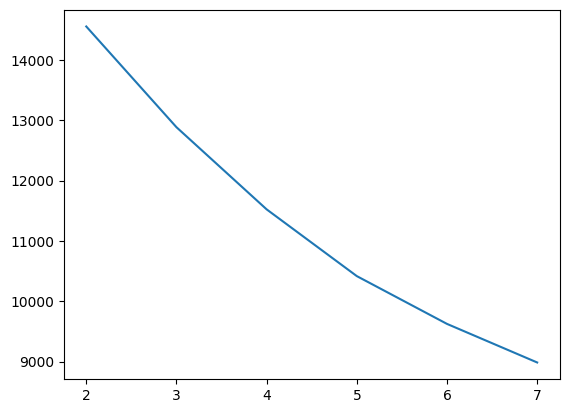

In [31]:
plt.plot(K_values,ssd)
plt.show()

In [32]:
final_model=KMeans(n_clusters=3,max_iter=150,random_state=1000)
final_model.fit(df2)

KMeans(max_iter=150, n_clusters=3, random_state=1000)

In [33]:
final_model.labels_

array([0, 1, 0, ..., 0, 0, 2])

In [34]:
df1["Cluster ID"]=final_model.labels_

In [35]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


--------------------------------------------------------------------------------------------------------------------------------

### Cluster - 0

In [36]:
c0 = df1[df1["Cluster ID"]==0]

In [37]:
c0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0


In [38]:
c0['quality'].value_counts()

5    311
6    279
7     41
4     37
Name: quality, dtype: int64

In [39]:
c0['pH'].min()

2.88

In [40]:
c0['pH'].max()

4.01

In [41]:
c0['pH'].mean().round(2)

3.4

In [42]:
c0['total sulfur dioxide'].mean()

34.30538922155689

In [43]:
c0['alcohol'].mean()

10.385553892220061

### Checking Quality Parameters In Cluster - 0

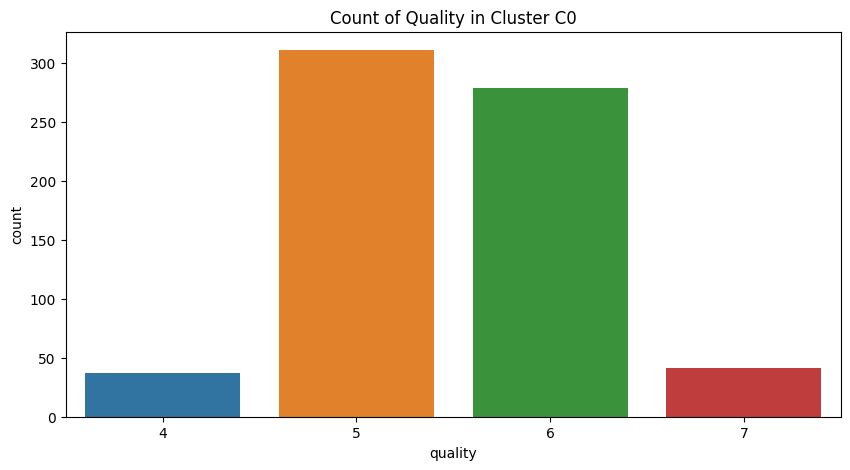

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=c0)
plt.title('Count of Quality in Cluster C0')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

### Cluster - 1

In [45]:
c1 = df1[df1["Cluster ID"]==1]
c1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,1
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,1
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5,1
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,7.3,0.690,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5,1
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6,1
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,1
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6,1


In [46]:
c1['quality'].value_counts()

5    266
6    102
4     13
7     10
Name: quality, dtype: int64

In [47]:
c1['pH'].min()

2.89

In [48]:
c1['pH'].max()

3.6

In [49]:
c1['pH'].mean().round(2)

3.28

In [50]:
c1['total sulfur dioxide'].mean()

87.8388746803069

In [51]:
c1['alcohol'].mean()

9.834484228483376

### Checking Quality Parameters In Cluster - 1

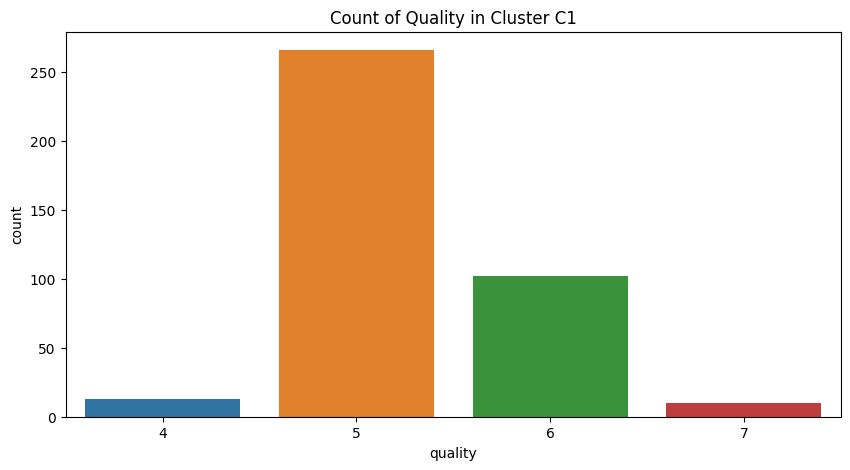

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=c1)
plt.title('Count of Quality in Cluster C1')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

### Cluster - 2

In [53]:
c2 = df1[df1["Cluster ID"]==2]
c2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5,2
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5,2
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,2
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,2
1584,6.7,0.32,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,2
1585,7.2,0.39,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6,2
1586,7.5,0.31,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,2


In [54]:
c2['quality'].value_counts()

6    257
7    148
5    104
4      3
Name: quality, dtype: int64

In [55]:
c2['pH'].min()

2.74

In [56]:
c2['pH'].max()

3.61

In [57]:
c2['pH'].mean().round(2)

3.21

In [58]:
c2['total sulfur dioxide'].mean()

31.62109375

In [59]:
c2['alcohol'].mean()

10.871614583320312

### Checking Quality Parameters In Cluster - 2

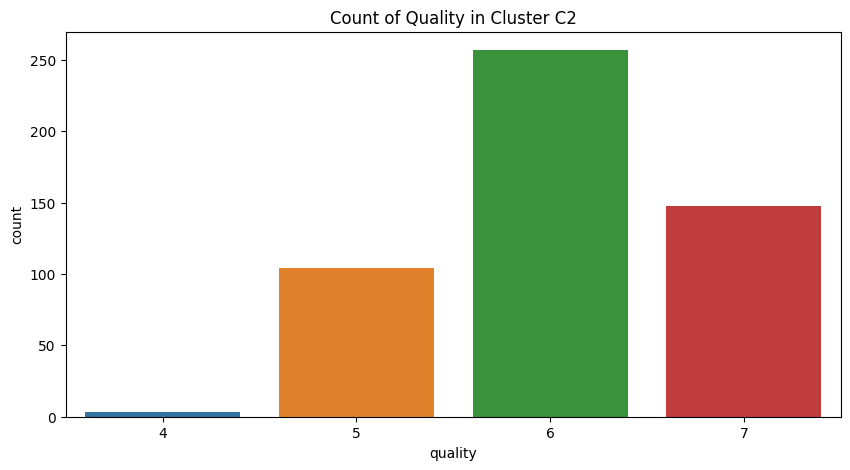

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=c2)
plt.title('Count of Quality in Cluster C2')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

In [61]:
df2["Cluster ID"]=final_model.labels_

In [62]:
df2

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
0,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899,0
1,2.012142,-1.394015,0.044102,0.223938,0.867524,0.614044,0.021518,-0.722650,0.132833,-0.578190,-0.839899,1
2,1.328617,-1.187675,-0.168425,0.096441,-0.089555,0.219759,0.128290,-0.332250,-0.043915,-0.578190,-0.839899,0
3,-1.405483,1.494756,-0.451794,-0.264800,0.101861,0.401737,0.662152,-0.982916,-0.456326,-0.578190,0.502401,2
4,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,0.417250,-0.981334,-0.380951,0.053942,1.537480,-0.083537,-0.992821,0.904016,-0.456326,0.088794,-0.839899,0
1567,0.132448,-0.878163,-0.239267,-0.541043,2.207435,0.128771,-0.875371,1.359482,0.604160,0.755777,0.502401,0
1568,-0.095393,-0.723408,-0.168425,-0.243551,1.250356,-0.204855,-0.544376,0.708816,0.545244,0.565210,0.502401,0
1569,0.673572,-0.774993,-0.380951,-0.264800,1.537480,-0.083537,-0.688519,1.684816,0.309580,-0.197056,-0.839899,0


In [63]:
df2[df2["Cluster ID"]==0]

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
0,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899,0
2,1.328617,-1.187675,-0.168425,0.096441,-0.089555,0.219759,0.128290,-0.332250,-0.043915,-0.578190,-0.839899,0
4,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899,0
5,0.759013,-1.394015,-0.522636,-0.264800,-0.280971,-0.204855,0.555380,1.294416,-0.574158,-0.959323,-0.839899,0
6,0.417250,-1.084504,-0.664320,-0.392297,-0.089555,0.371408,-0.192027,-0.071983,-1.163318,-0.959323,-0.839899,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1565,0.531171,-0.981334,-0.451794,-0.413546,1.154648,-0.265514,-0.133302,0.708816,0.957656,-0.864040,0.502401,0
1566,0.417250,-0.981334,-0.380951,0.053942,1.537480,-0.083537,-0.992821,0.904016,-0.456326,0.088794,-0.839899,0
1567,0.132448,-0.878163,-0.239267,-0.541043,2.207435,0.128771,-0.875371,1.359482,0.604160,0.755777,0.502401,0
1568,-0.095393,-0.723408,-0.168425,-0.243551,1.250356,-0.204855,-0.544376,0.708816,0.545244,0.565210,0.502401,0


In [64]:
df2[df2["Cluster ID"]==1]

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
1,2.012142,-1.394015,0.044102,0.223938,0.867524,0.614044,0.021518,-0.722650,0.132833,-0.578190,-0.839899,1
9,-0.152354,0.463052,2.523578,-0.349798,0.101861,1.675581,0.555380,0.253350,0.839824,0.088794,-0.839899,1
11,-0.152354,0.463052,2.523578,-0.349798,0.101861,1.675581,0.555380,0.253350,0.839824,0.088794,-0.839899,1
14,0.531171,-0.465482,0.894208,1.881397,3.451638,2.979755,0.982470,-0.982916,1.311151,-1.149890,-0.839899,1
15,0.531171,-0.413897,0.965050,1.753900,3.355930,3.070744,0.982470,-0.917849,1.605731,-1.149890,-0.839899,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1544,0.929894,0.256711,-0.239267,-0.392297,1.824603,1.736240,-0.234736,0.123217,-0.868738,-0.864040,-0.839899,1
1546,-1.234601,2.629631,8.049267,-0.286050,0.676108,1.372285,0.005502,0.513616,-1.045486,0.088794,0.502401,1
1555,-0.380195,0.101955,-0.310109,-0.286050,1.537480,1.554263,-0.523022,0.123217,-0.220663,-0.578190,-0.839899,1
1560,0.759013,0.308296,-0.026741,-0.413546,1.728895,1.675581,-1.398556,-0.267183,0.721992,2.280310,0.502401,1


In [65]:
df2[df2["Cluster ID"]==2]

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
3,-1.405483,1.494756,-0.451794,-0.264800,0.101861,0.401737,0.662152,-0.982916,-0.456326,-0.578190,0.502401,2
13,0.474211,0.101955,-0.664320,0.563929,-0.663802,-0.538481,0.341835,-0.332250,5.317434,-1.245173,-0.839899,2
17,0.189409,0.050370,-0.593478,5.961297,0.006153,0.280419,0.021518,-1.308249,3.667788,-1.054606,-0.839899,2
19,-1.177641,1.236830,-0.522636,5.387561,0.101861,0.280419,0.074904,-1.763716,2.489470,-1.149890,0.502401,2
22,-0.551077,-0.310726,-0.664320,0.393934,-0.568094,-0.295844,-0.085255,-0.917849,1.487899,-0.864040,-0.839899,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,-1.006760,0.308296,-0.097583,-0.413546,-0.663802,-0.629470,-1.099593,0.318416,-0.338495,1.422760,0.502401,2
1556,-1.177641,0.875734,-0.097583,-0.562293,0.771816,-0.386833,-1.024852,-0.137050,0.839824,1.136910,1.844701,2
1557,-0.778918,0.875734,0.044102,-0.456045,0.580400,0.037782,-0.971466,-0.071983,1.075487,1.041627,0.502401,2
1558,-1.234601,0.720978,-0.097583,-0.477295,1.728895,0.401737,-0.982144,0.188283,1.134403,0.946343,0.502401,2


In [66]:
df2

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster ID
0,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899,0
1,2.012142,-1.394015,0.044102,0.223938,0.867524,0.614044,0.021518,-0.722650,0.132833,-0.578190,-0.839899,1
2,1.328617,-1.187675,-0.168425,0.096441,-0.089555,0.219759,0.128290,-0.332250,-0.043915,-0.578190,-0.839899,0
3,-1.405483,1.494756,-0.451794,-0.264800,0.101861,0.401737,0.662152,-0.982916,-0.456326,-0.578190,0.502401,2
4,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,0.417250,-0.981334,-0.380951,0.053942,1.537480,-0.083537,-0.992821,0.904016,-0.456326,0.088794,-0.839899,0
1567,0.132448,-0.878163,-0.239267,-0.541043,2.207435,0.128771,-0.875371,1.359482,0.604160,0.755777,0.502401,0
1568,-0.095393,-0.723408,-0.168425,-0.243551,1.250356,-0.204855,-0.544376,0.708816,0.545244,0.565210,0.502401,0
1569,0.673572,-0.774993,-0.380951,-0.264800,1.537480,-0.083537,-0.688519,1.684816,0.309580,-0.197056,-0.839899,0


### Clustering based on volatile acidity w.r.t sulphates, chlorides, residual sugar and total sulphure dioxide

In [67]:
X = df2.iloc[:, [0,8]].values
X

array([[ 0.98685451, -0.57415833],
       [ 2.01214188,  0.13283271],
       [ 1.32861697, -0.04391505],
       ...,
       [-0.09539328,  0.54524415],
       [ 0.67357225,  0.30958047],
       [-1.23460147,  0.01500087]])

In [68]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 0, 1])

<AxesSubplot: xlabel='volatile acidity', ylabel='sulphates'>

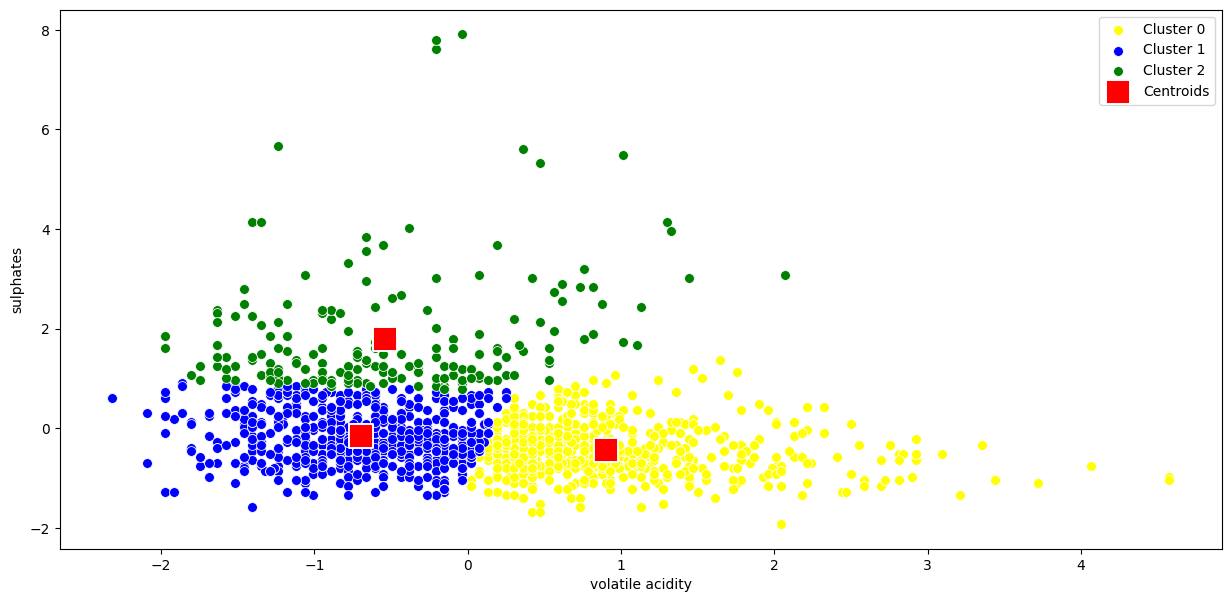

In [69]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("volatile acidity")
plt.ylabel("sulphates")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.1 shows that cluster no.2 has higher amount of sulphates and cluster no. 0 has higher volatile acidity.

In [70]:
X = df2.iloc[:, [0,2]].values
X

array([[ 0.98685451, -0.45179359],
       [ 2.01214188,  0.04410162],
       [ 1.32861697, -0.1684249 ],
       ...,
       [-0.09539328, -0.1684249 ],
       [ 0.67357225, -0.38095142],
       [-1.23460147,  0.75252336]])

In [71]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 0, 1])

<AxesSubplot: xlabel='volatile acidity', ylabel='residual sugar'>

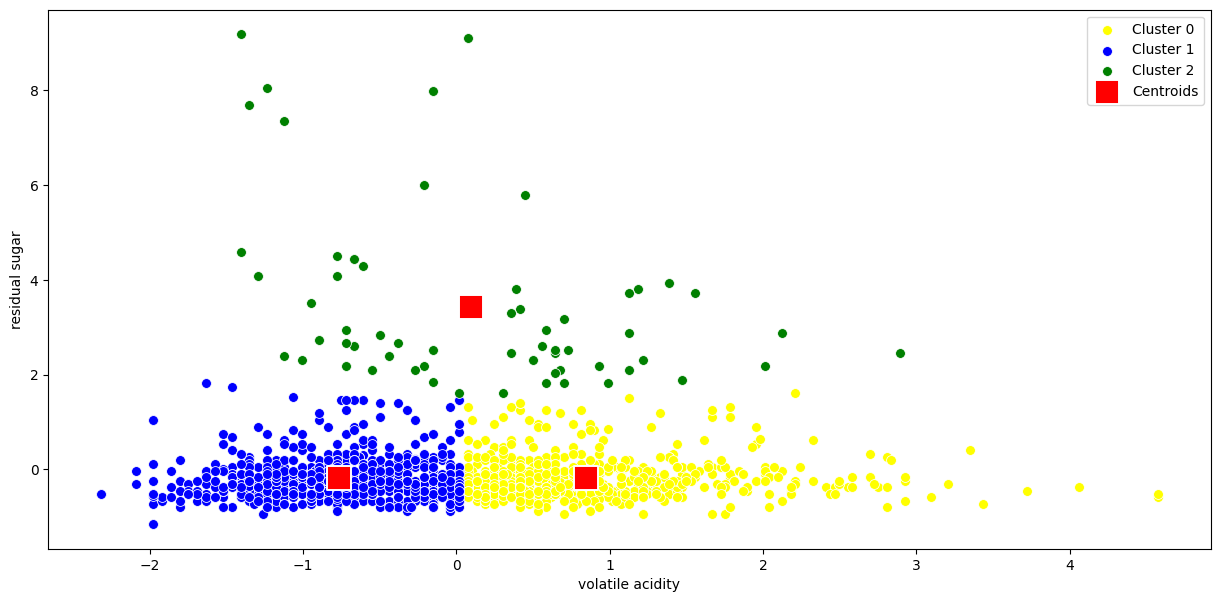

In [72]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("volatile acidity")
plt.ylabel("residual sugar")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.2 shows that the residual sugar is higher in Cluster no.2

In [73]:
X = df2.iloc[:, [0,3]].values
X

array([[ 0.98685451, -0.24355066],
       [ 2.01214188,  0.22393784],
       [ 1.32861697,  0.09644097],
       ...,
       [-0.09539328, -0.24355066],
       [ 0.67357225, -0.26480013],
       [-1.23460147, -0.43479595]])

In [74]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 2, 0, 2])

<AxesSubplot: xlabel='volatile acidity', ylabel='chlorides'>

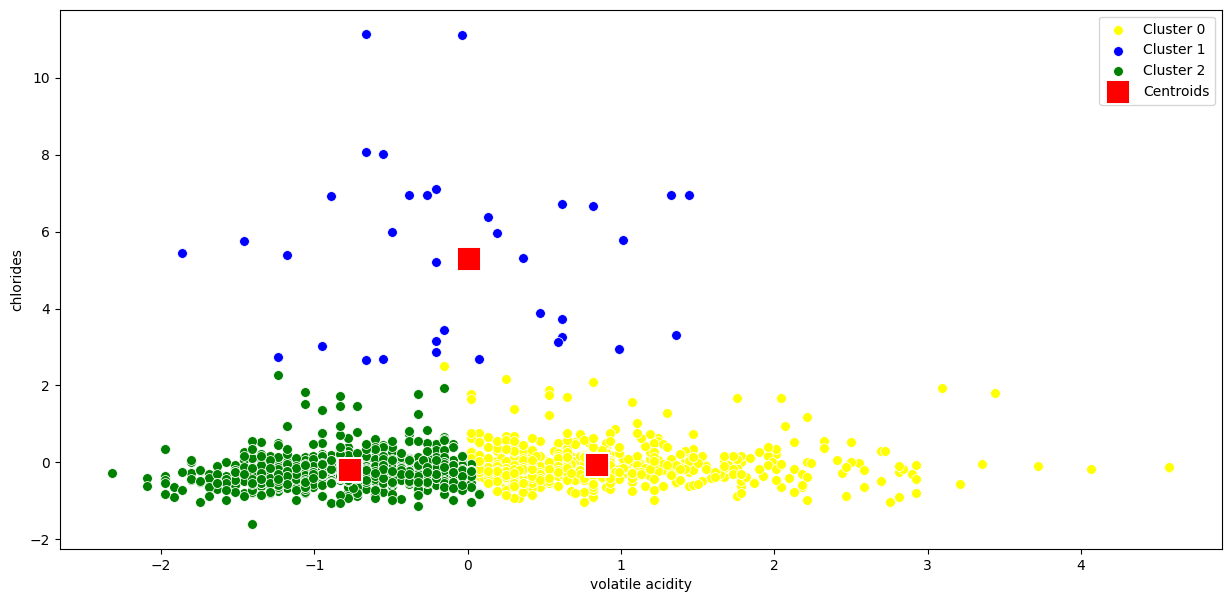

In [75]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("volatile acidity")
plt.ylabel("chlorides")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.3 shows that the chloride content in higher in Cluster no.1

In [76]:
X = df2.iloc[:, [0,9]].values
X

array([[ 0.98685451, -0.95932288],
       [ 2.01214188, -0.57818961],
       [ 1.32861697, -0.57818961],
       ...,
       [-0.09539328,  0.56521021],
       [ 0.67357225, -0.19705633],
       [-1.23460147,  0.56521021]])

In [77]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([2, 2, 2, ..., 1, 2, 1])

<AxesSubplot: xlabel='volatile acidity', ylabel='alcohol'>

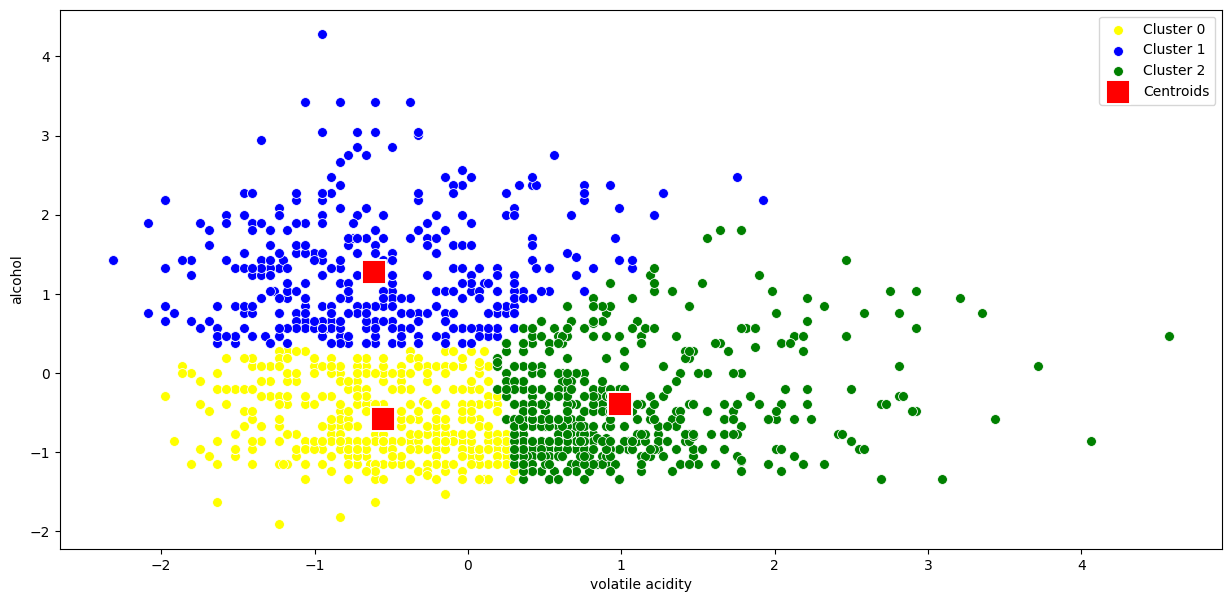

In [78]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("volatile acidity")
plt.ylabel("alcohol")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.4 shows that the cluster no.1 has higher alcohol content.

In [79]:
X = df2.iloc[:, [0,5]].values
X

array([[ 0.98685451, -0.38683296],
       [ 2.01214188,  0.61404448],
       [ 1.32861697,  0.21975943],
       ...,
       [-0.09539328, -0.20485525],
       [ 0.67357225, -0.08353677],
       [-1.23460147, -0.14419601]])

In [80]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 0, 1])

<AxesSubplot: xlabel='volatile acidity', ylabel='total sulfur dioxide'>

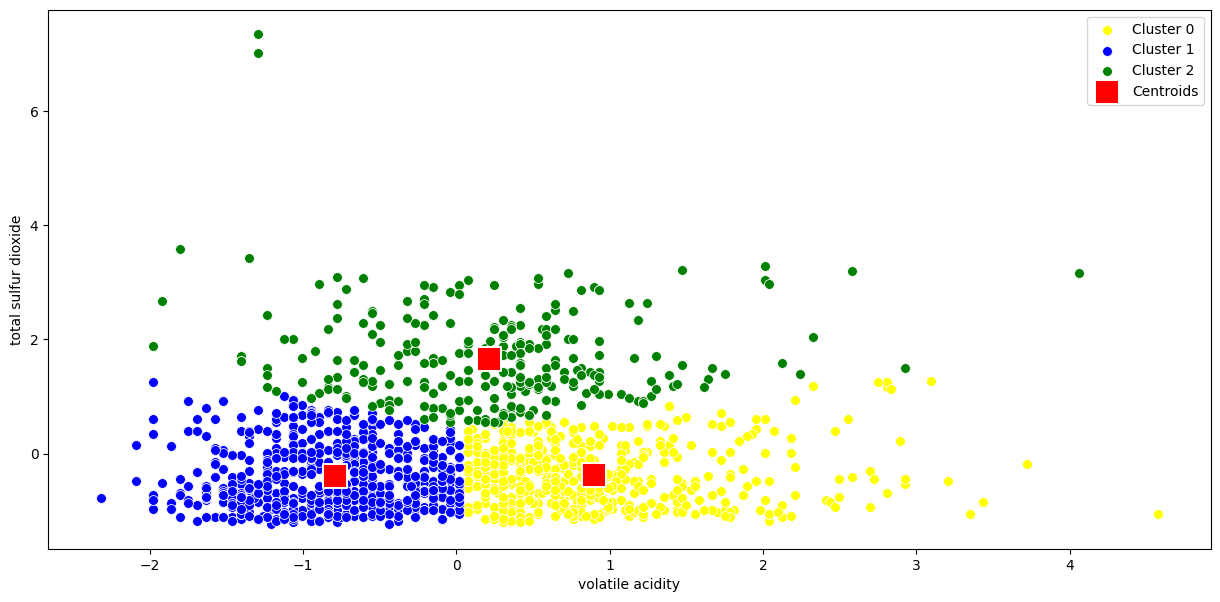

In [81]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("volatile acidity")
plt.ylabel("total sulfur dioxide")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.5 shows the higher total sulphur dioxide in Cluster-2

In [82]:
X = df2.iloc[:, [1,5]].values
X

array([[-1.39401549, -0.38683296],
       [-1.39401549,  0.61404448],
       [-1.18767467,  0.21975943],
       ...,
       [-0.72340781, -0.20485525],
       [-0.77499302, -0.08353677],
       [ 1.03048919, -0.14419601]])

In [83]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 1])

<AxesSubplot: xlabel='citric acid', ylabel='total sulfur dioxide'>

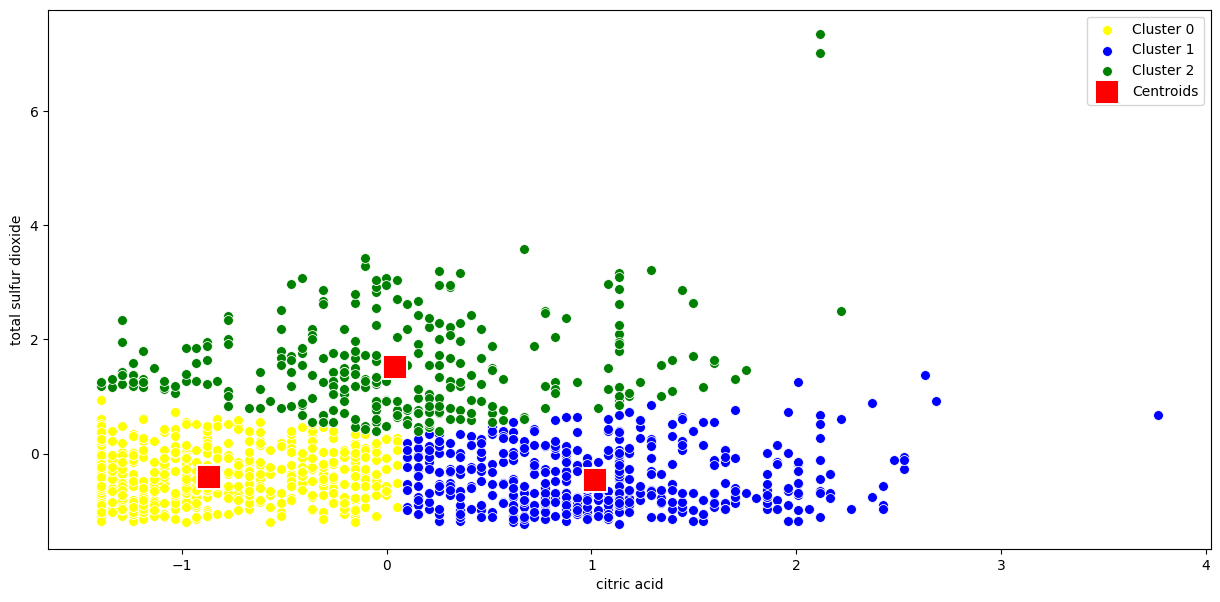

In [84]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("citric acid")
plt.ylabel("total sulfur dioxide")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.6 shows the higher amount of citric acid in Cluster-1

--------------------------------------------------------------------------------------------------------------------------------

## Clustering based on total sulphur dioxide and pH

In [85]:
X = df2.iloc[:, [5,7]].values
X

array([[-0.38683296,  1.29441577],
       [ 0.61404448, -0.72264955],
       [ 0.21975943, -0.33224981],
       ...,
       [-0.20485525,  0.70881616],
       [-0.08353677,  1.68481551],
       [-0.14419601,  0.51361629]])

In [86]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 1, 2, ..., 0, 0, 0])

<AxesSubplot: xlabel='pH', ylabel='total sulphur dioxide'>

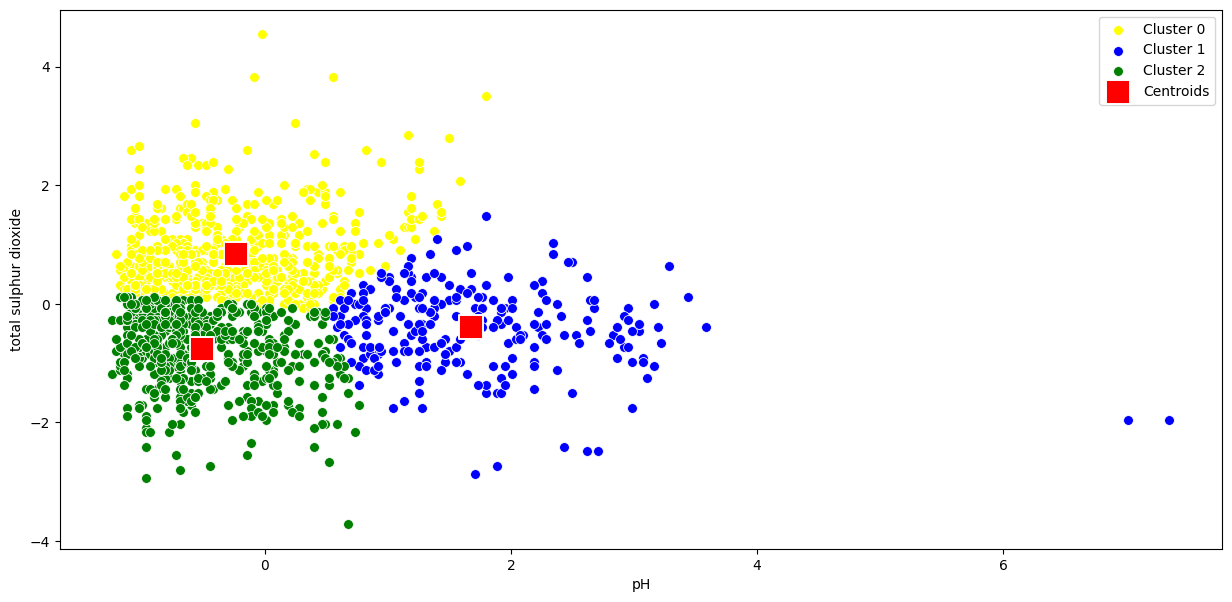

In [87]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("pH")
plt.ylabel("total sulphur dioxide")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.7 shows that cluster nos, 0 and 2 has more acidic properties as compared to that of no.1 

-------------------------------------------------------------------------------------------------------------------------------

## Clustering based on chlorides and pH

In [88]:
X = df2.iloc[:, [7,3]].values
X

array([[ 1.29441577, -0.24355066],
       [-0.72264955,  0.22393784],
       [-0.33224981,  0.09644097],
       ...,
       [ 0.70881616, -0.24355066],
       [ 1.68481551, -0.26480013],
       [ 0.51361629, -0.43479595]])

In [89]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 2, 2, ..., 0, 0, 0])

<AxesSubplot: xlabel='pH', ylabel='chlorides'>

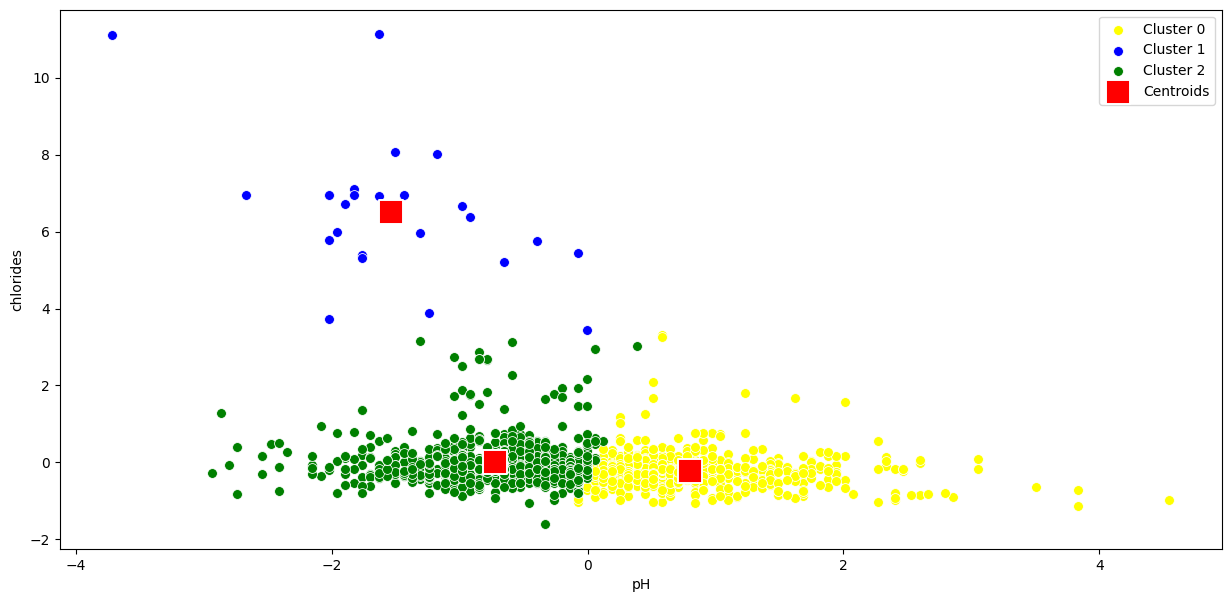

In [90]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("pH")
plt.ylabel("chlorides")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.8 shows the higher amount of chlorides in Cluster-1, causing the lower pH

--------------------------------------------------------------------------------------------------------------------------------

## Clustering based on sulphates and pH

In [91]:
X = df2.iloc[:, [7,8]].values
X

array([[ 1.29441577, -0.57415833],
       [-0.72264955,  0.13283271],
       [-0.33224981, -0.04391505],
       ...,
       [ 0.70881616,  0.54524415],
       [ 1.68481551,  0.30958047],
       [ 0.51361629,  0.01500087]])

In [92]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 2, 2, ..., 0, 0, 0])

<AxesSubplot: xlabel='pH', ylabel='sulphates'>

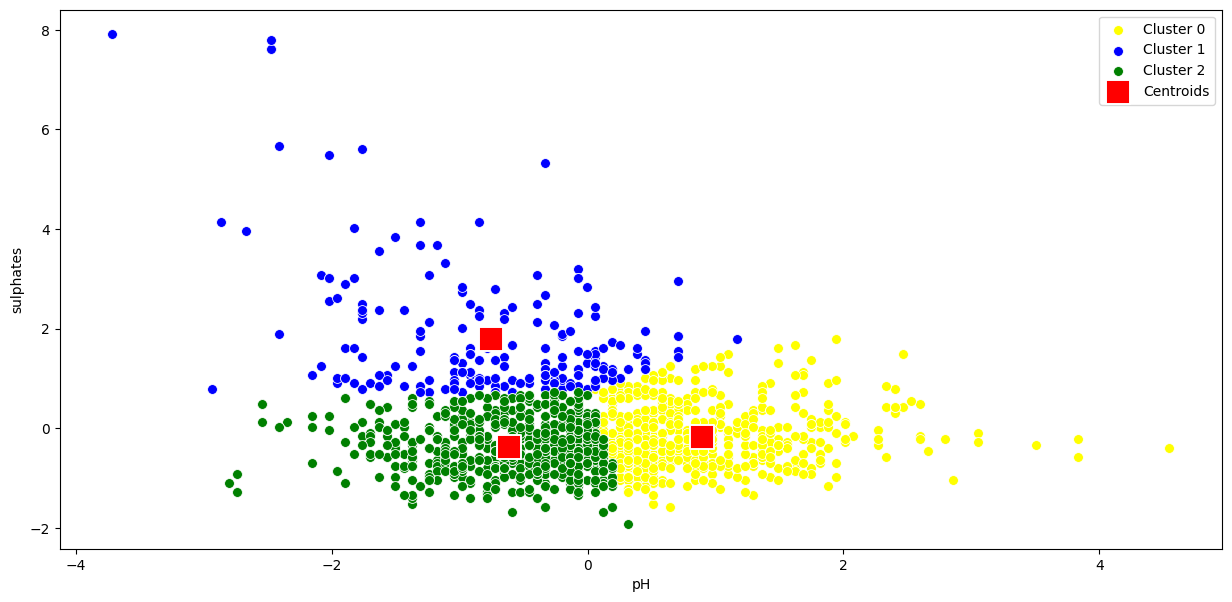

In [93]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("pH")
plt.ylabel("sulphates")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.9 shows the higher amount of sulphates in Cluster-1, causing the lower pH

--------------------------------------------------------------------------------------------------------------------------------

## Clustering based on alcohol and pH

In [94]:
X = df2.iloc[:, [7,9]].values
X

array([[ 1.29441577, -0.95932288],
       [-0.72264955, -0.57818961],
       [-0.33224981, -0.57818961],
       ...,
       [ 0.70881616,  0.56521021],
       [ 1.68481551, -0.19705633],
       [ 0.51361629,  0.56521021]])

In [95]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([2, 0, 0, ..., 1, 2, 1])

<AxesSubplot: xlabel='pH', ylabel='alcohol'>

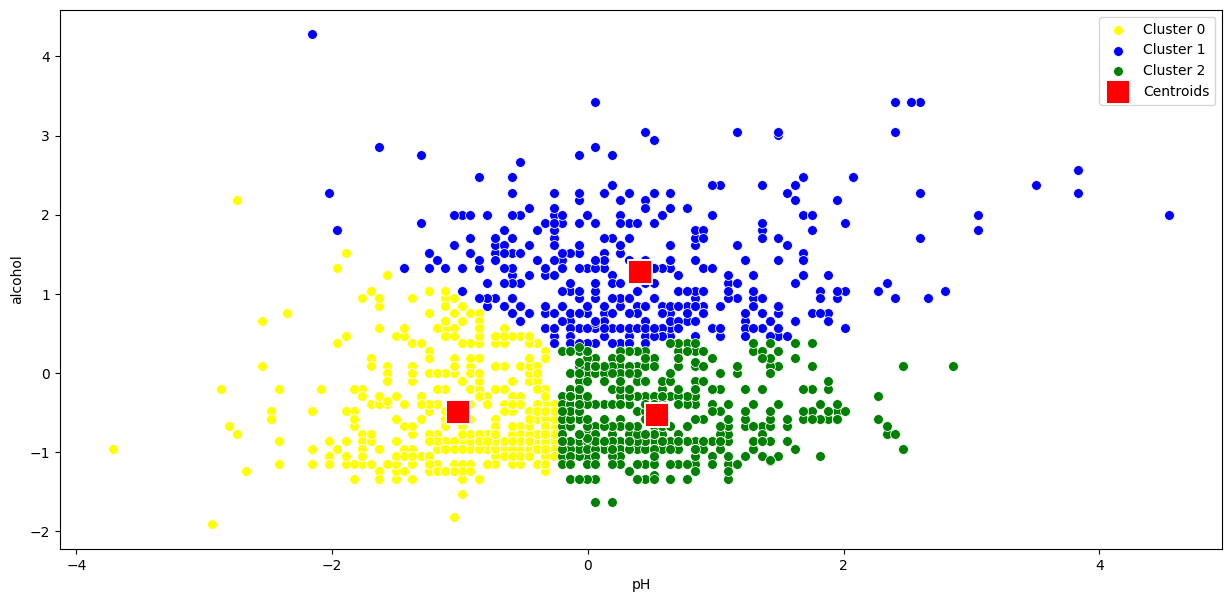

In [96]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("pH")
plt.ylabel("alcohol")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.10 shows relatively lower amount of alcohol in Cluster-0, causing the lower pH

-------------------------------------------------------------------------------------------------------------------------------

## Clustering based on density and pH

In [97]:
X = df2.iloc[:, [6,7]].values
X

array([[ 0.5553799 ,  1.29441577],
       [ 0.02151761, -0.72264955],
       [ 0.12829007, -0.33224981],
       ...,
       [-0.54437642,  0.70881616],
       [-0.68851924,  1.68481551],
       [-0.677842  ,  0.51361629]])

In [98]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 2, 2, ..., 0, 0, 0])

<AxesSubplot: xlabel='density', ylabel='pH'>

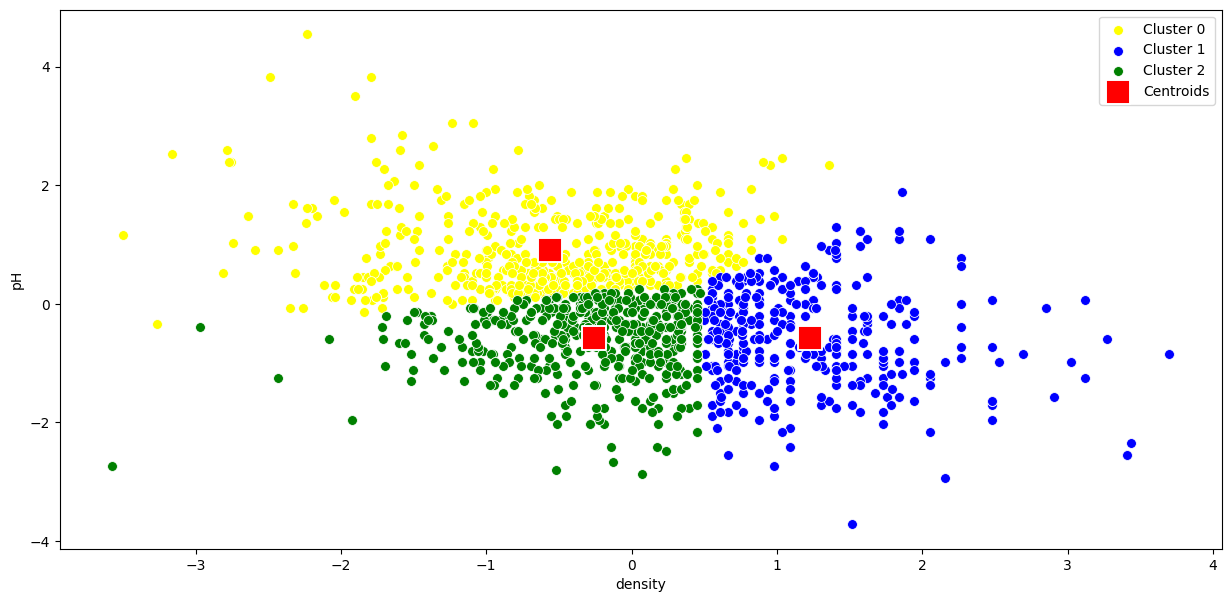

In [99]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("density")
plt.ylabel("pH")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.11 shows the density of Cluster-1 is higher than those of Cluster-0 and 2.

--------------------------------------------------------------------------------------------------------------------------------

## Clustering based on chlorides and alcohol

In [100]:
X = df2.iloc[:, [3,9]].values
X

array([[-0.24355066, -0.95932288],
       [ 0.22393784, -0.57818961],
       [ 0.09644097, -0.57818961],
       ...,
       [-0.24355066,  0.56521021],
       [-0.26480013, -0.19705633],
       [-0.43479595,  0.56521021]])

In [101]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 2, 0, 2])

<AxesSubplot: xlabel='chlorides', ylabel='alcohol'>

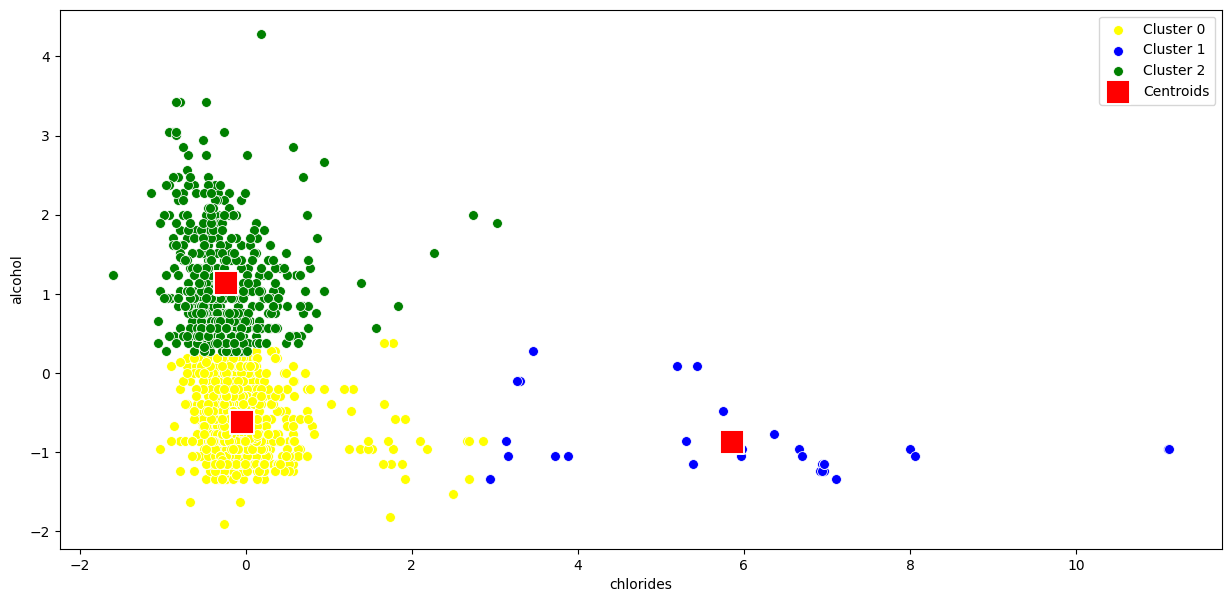

In [102]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("chlorides")
plt.ylabel("alcohol")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.12 shows that the proportion of alcohol in Cluster no.2 is higher as compred to chlorides.

--------------------------------------------------------------------------------------------------------------------------------

## Clustering based on sulphates and alcohol

In [103]:
X = df2.iloc[:, [8,9]].values
X

array([[-0.57415833, -0.95932288],
       [ 0.13283271, -0.57818961],
       [-0.04391505, -0.57818961],
       ...,
       [ 0.54524415,  0.56521021],
       [ 0.30958047, -0.19705633],
       [ 0.01500087,  0.56521021]])

In [104]:
y_kmeans = final_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 0, 1])

<AxesSubplot: xlabel='sulphates', ylabel='alcohol'>

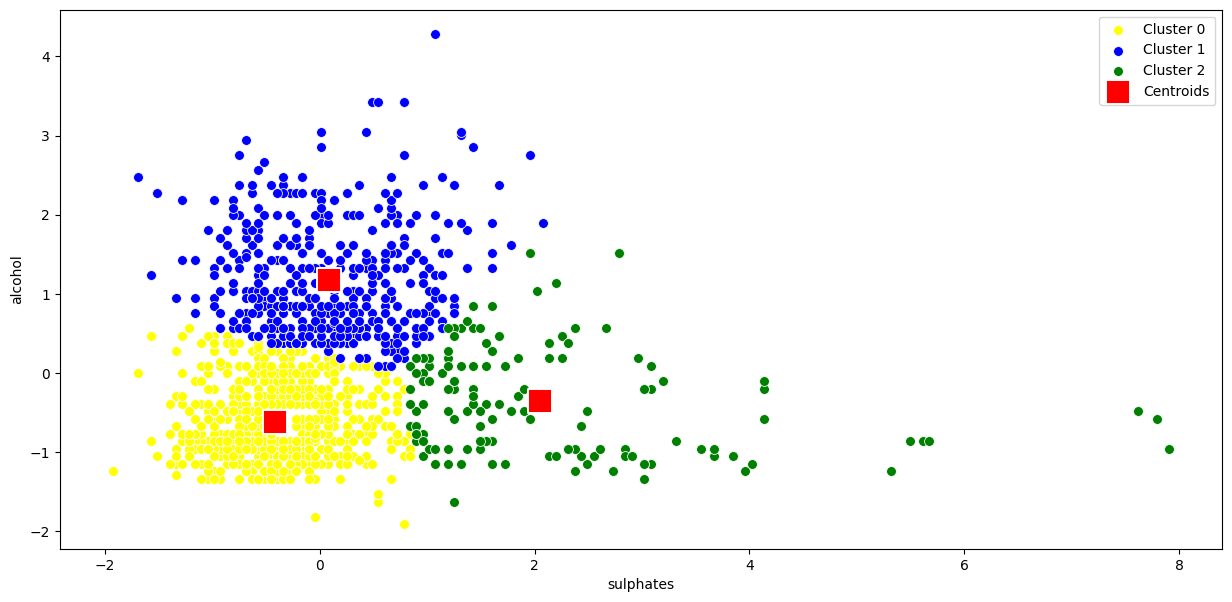

In [105]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 0',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("sulphates")
plt.ylabel("alcohol")
sns.scatterplot( x = final_model.cluster_centers_[0:4, 0], y =  final_model.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

### Fig.13 shows that the proportion of alcohol in Cluster no.2 is higher as compred to sulphates.

### K-Means Model Fitting For Scaled Data 

In [106]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(df2)
labels = kmeans.labels_

print(labels)


[0 2 0 ... 0 0 1]


In [107]:
inter_cluster_variance = kmeans.inertia_
print("Inter-Cluster Variance:", inter_cluster_variance)

Inter-Cluster Variance: 12883.142303826899


In [108]:
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.527746,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899
1,-0.297428,2.012142,-1.394015,0.044102,0.223938,0.867524,0.614044,0.021518,-0.722650,0.132833,-0.578190,-0.839899
2,-0.297428,1.328617,-1.187675,-0.168425,0.096441,-0.089555,0.219759,0.128290,-0.332250,-0.043915,-0.578190,-0.839899
3,1.660281,-1.405483,1.494756,-0.451794,-0.264800,0.101861,0.401737,0.662152,-0.982916,-0.456326,-0.578190,0.502401
4,-0.527746,0.986855,-1.394015,-0.451794,-0.243551,-0.472386,-0.386833,0.555380,1.294416,-0.574158,-0.959323,-0.839899
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,-1.218702,0.417250,-0.981334,-0.380951,0.053942,1.537480,-0.083537,-0.992821,0.904016,-0.456326,0.088794,-0.839899
1567,-1.391441,0.132448,-0.878163,-0.239267,-0.541043,2.207435,0.128771,-0.875371,1.359482,0.604160,0.755777,0.502401
1568,-1.161122,-0.095393,-0.723408,-0.168425,-0.243551,1.250356,-0.204855,-0.544376,0.708816,0.545244,0.565210,0.502401
1569,-1.391441,0.673572,-0.774993,-0.380951,-0.264800,1.537480,-0.083537,-0.688519,1.684816,0.309580,-0.197056,-0.839899


In [109]:
x = df.iloc[:, :-1].drop(['fixed acidity'], axis=1)
#x = df.iloc[:, :-1].drop(['fixed acidity','citric acid','density','residual sugar','free sulfur dioxide'], axis=1)
x

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [110]:
y = df[['quality']]
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2000)

### Applying Logistic Regression Model For Checking Quality w.r.t Other Parameters

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [113]:
lo_model=LogisticRegression()

In [114]:
lo_model

LogisticRegression()

In [115]:
lo_model.fit(x_train,y_train)

LogisticRegression()

In [116]:
lo_pred=lo_model.predict(x_test)

In [117]:
lo_pred

array([5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6,

In [118]:
value_counts = np.bincount(lo_pred)
count_0 = value_counts[5]
count_1 = value_counts[6]

print(count_0,count_1)

174 145


In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [120]:
accuracy_score(lo_pred,y_test)

0.6

### Applying Random forest Classifier Model For Checking Quality w.r.t Other Parameters

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [122]:
rf_model=RandomForestClassifier(n_estimators = 20, random_state = 2000)

In [123]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=2000)

In [124]:
rf_pred = rf_model.predict(x_test)

In [125]:
rf_pred

array([5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6,
       6, 7, 6, 6, 5, 5, 5, 7, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 7, 7, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 7, 6, 6, 7, 5, 5, 5,
       6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6,
       6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 5, 7, 6, 6, 7, 6, 6,
       7, 6, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 7, 6, 6, 5, 5, 5, 7, 6, 5, 7, 6, 5, 7, 6, 7, 5, 5, 5, 5, 6,
       6, 7, 5, 6, 5, 6, 5, 5, 5, 7, 5, 5, 7, 5, 7, 6, 6, 5, 7, 6, 5, 7,
       6, 5, 5, 6, 6, 5, 5, 6, 5, 7, 5, 5, 5, 6, 6,

In [126]:
accuracy_score(rf_pred,y_test)

0.69375

#### Applying Hyperparameter Tuning For Random Classifier 

In [152]:
RF = RandomForestClassifier() #call the RF model

In [153]:
### parameters
parameters = {'max_depth':np.arange(1,15),
               'min_samples_split': np.arange(2,6), 
               'random_state':[1000], 
               'n_estimators': np.arange(20,45)}

In [154]:
parameters

{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_split': array([2, 3, 4, 5]),
 'random_state': [1000],
 'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44])}

In [155]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [156]:
### Define search
search = RandomizedSearchCV(RF, parameters, scoring='accuracy')

In [157]:
### Execute the search
result = search.fit(x_train, y_train)

In [158]:
result.best_score_

0.6755514705882353

In [159]:
best_params = result.best_params_
best_params

{'random_state': 1000,
 'n_estimators': 31,
 'min_samples_split': 4,
 'max_depth': 14}

In [160]:
rf1 = RandomForestClassifier(**best_params)
rf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=31, n_jobs=None, oob_score=False,
                       random_state=1000, verbose=0, warm_start=False)

In [161]:
y_pred = rf1.predict(x_test)
y_pred

array([5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 6, 6, 6, 5, 5, 7, 7, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 5, 5,
       6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 7, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 6, 7, 6, 7,
       6, 7, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 7, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 7, 6, 7, 5, 5, 6, 5, 6,
       6, 7, 5, 6, 5, 7, 5, 6, 5, 7, 5, 5, 6, 5, 7, 5, 6, 5, 7, 5, 5, 7,
       5, 5, 5, 5, 6, 5, 5, 7, 5, 7, 5, 5, 5, 6, 6,

In [162]:
accuracy_score(y_test, y_pred)

0.7

## Accuracy comparison with different machine learning models

In [138]:
import pandas as pd
import pycaret
from pycaret.classification import *

# Load your dataset
data = pd.read_csv('winequality_red.csv')

In [139]:
# Setting up the PyCaret environment
clf_setup = setup(data, target='quality')

,Description,Value
0,Session id,6573
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [140]:
# Compare different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6712,0.5867,0.6712,0.6449,0.6521,0.4647,0.4691,0.1390
rf,Random Forest Classifier,0.6667,0.5811,0.6667,0.6363,0.6460,0.4563,0.4603,0.1770
lightgbm,Light Gradient Boosting Machine,0.6577,0.5722,0.6577,0.6359,0.6421,0.4485,0.4519,0.7000
gbc,Gradient Boosting Classifier,0.6354,0.5557,0.6354,0.6162,0.6224,0.4170,0.4195,0.7580
lda,Linear Discriminant Analysis,0.5952,0.5305,0.5952,0.5779,0.5820,0.3509,0.3534,0.0190
lr,Logistic Regression,0.5934,0.5239,0.5934,0.5558,0.5643,0.3262,0.3321,1.7230
dt,Decision Tree Classifier,0.5844,0.4775,0.5844,0.5884,0.5832,0.3527,0.3541,0.0210
ridge,Ridge Classifier,0.5799,0.0000,0.5799,0.4771,0.5226,0.2839,0.2951,0.0170
qda,Quadratic Discriminant Analysis,0.5568,0.5062,0.5568,0.5632,0.5499,0.3007,0.3076,0.0200
nb,Naive Bayes,0.5541,0.5134,0.5541,0.5715,0.5580,0.3129,0.3156,0.0210


## Conclusions:

### The red wine data is analyzed by considering various paramters, depending on the quality levels 4,5,6 and 7 as reported.
### Due to large proportions among values of parameters w.r.t density,pH, the standard scaler is used for further analysis.
### Variance Inflation Factor is used to eliminate fixed acidity columns as a part of removing multicollinearity.
### K-means clustering model is applied to study how parameters such as pH, total sulphure dioxide, chlorides, sulphates and volatile acidity are correlated.
### In the K-means model, the total 3 cluster, viz.,Cluster-0,1,and 2 are formed and it was observed that they have been formed mainly on the basis of pH and density.
### Cluster-0,1 and 2 contain predominantly large fraction of quality nos. 5 and 6, 5, and 5, 6 and 7 respectively. The proportion of quality no.4 found much lower as compared to that of others.

### The count plot of the quality in the clusters is as follows:

### Cluster-0 
#### quality - 4 = 48
#### quality - 5 = 320
#### quality - 6 = 270
#### quality - 7 = 50

### Cluster-1 
#### quality - 4 = 20
#### quality - 5 = 270
#### quality - 6 = 100
#### quality - 7 = 15

### Cluster-2
#### quality - 4 = 5
#### quality - 5 = 100
#### quality - 6 = 270
#### quality - 7 = 150

### The following are inferences based on location of a centrod in the each cluster. 

### Cluster nos.0 and 2 have acidic qualities because of higher amount of sulphates and total sulphure dioxide. 
### Cluster-1 has acidic qualities  because of higher amount of alcohol, chlorides and sulphates.
### Clusters -0 and 2 have higher volatile acidity as compared to Cluster-1.
### Cluster-0 has lower alcohol content as compared to the other clusters.
### Cluster-1 also has higher alcohol and residual sugar content as compared to the other clusters.
### As compared to Cluster-0, the increase in the count of quality no.7 in Cluster no.2 has contributed to change in acidic properties.
### Cluster-1 has higher density as compared to the other clusters, possibly because of more chloride and alcohol composition.
### A platau like trend is observed when total sulphur dioxide content is compared with citric acid in the clusters. It increased from Cluster no. 1 to 2 and decreased in Cluster no.1. The higher proportion of quality-7 in Cluster-2 can be the contributing factor for the higher amount of total sulphur dioxide.
### It can be inferred that the quality is dependent upon the molecular composition in the wine.
### The taste of the wine may vary depending on the composition and pH.
### With reference to clusters, the quality aspects can be analyzed for making wine of different compositions.
### The logistic regression model showed poor accuracy when the quality parameter was analyzed w.r.t other parameters.
### K-means clustering helps to differentiate wine based on composition and pH, thus it assists in further processing for additives.
### Random Forest classifier model is used to check how selected features or parameters, except the fixed acidity, affect the quality. The accuracy of the model is around 70% when it was checked with the hyperparameter tuning. 
### Pycaret analysis shows that Random Forest Classifier is the best as it gives the higher accuracy.

